In [74]:
# combined ranking housing and school

In [75]:
import os
import pandas as pd

In [76]:
# filenames
housing_rank_file = os.path.join("Results","house_rent_ranking.csv")
school_rank_file = os.path.join("Results","school_ranking.csv")

In [77]:
housing_rank = pd.read_csv(housing_rank_file)
school_rank = pd.read_csv(school_rank_file)

In [78]:
housing_rank

,City,own,rent
0,Raleigh,8,8
1,Austin,7,7
2,Washington DC,6,6
3,Atlanta,5,4
4,Chicago,4,5
5,New York,3,2
6,Boston,2,3
7,Los Angeles,1,1


In [79]:
school_rank

,City,schools,college
0,Los Angeles,8,7
1,Austin,7,3
2,Atlanta,6,6
3,Washington DC,5,2
4,New York,4,5
5,Raleigh,3,8
6,Chicago,2,1
7,Boston,1,4


In [80]:
# combine ranking into one file
combined_rank = housing_rank.merge(school_rank, on='City')

In [81]:
c = combined_rank.set_index("City")
c

,own,rent,schools,college
City,,,,
Raleigh,8,8,3,8
Austin,7,7,7,3
Washington DC,6,6,5,2
Atlanta,5,4,6,6
Chicago,4,5,2,1
New York,3,2,4,5
Boston,2,3,1,4
Los Angeles,1,1,8,7


In [82]:
combined_rank_file = os.path.join("Results","house_afford_school_ranking.csv")
c.to_csv(combined_rank_file)

In [83]:
# Visualize Combined Ranking

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [85]:
c = c.apply(pd.to_numeric)

In [86]:
c = c.reset_index()

In [87]:
c=c.rename(columns={'own':'rating_owning',
                                          'rent':'rating_renting',
                                          'schools':'rating_schools',
                                          'college':'rating_colleges'})


In [88]:
c = c.melt('City', var_name='rating', value_name='vals')


In [89]:
g = sns.factorplot(kind='bar',x="vals", y='City',hue='rating', data=c, size=10)

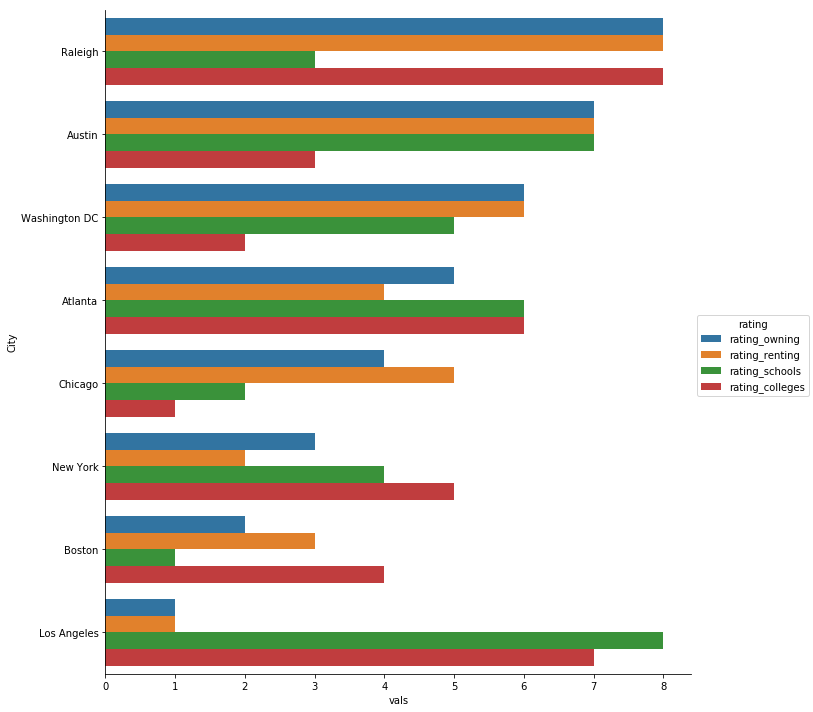

In [90]:
combined_ranking_visual = os.path.join("Results","combined_ranking_visual.png")
plt.savefig(combined_ranking_visual)
plt.show()